# Image Transformations

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

**Carregar imagem**

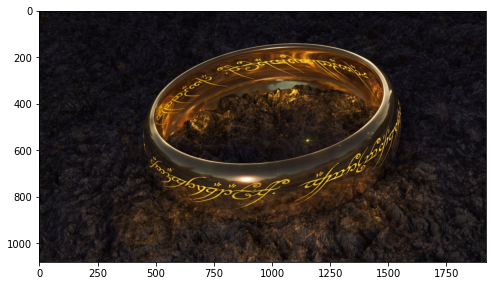

Dimensões: 1920 x 1080


In [2]:
img = cv2.imread('images/anel.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(8,6))
plt.imshow(img)
plt.show()

print(f'Dimensões: {img.shape[1]} x {img.shape[0]}')

### 1.   Crop and flip an image using Numpy array indexing.

In [3]:
x_begin, x_end = 428, 428 + 1140
y_begin, y_end = 134, 134 + 790

cropped_img = img[y_begin:y_end, x_begin:x_end]

flip_x_img = np.flip(img, axis=1)
flip_y_img = np.flip(img, axis=0)

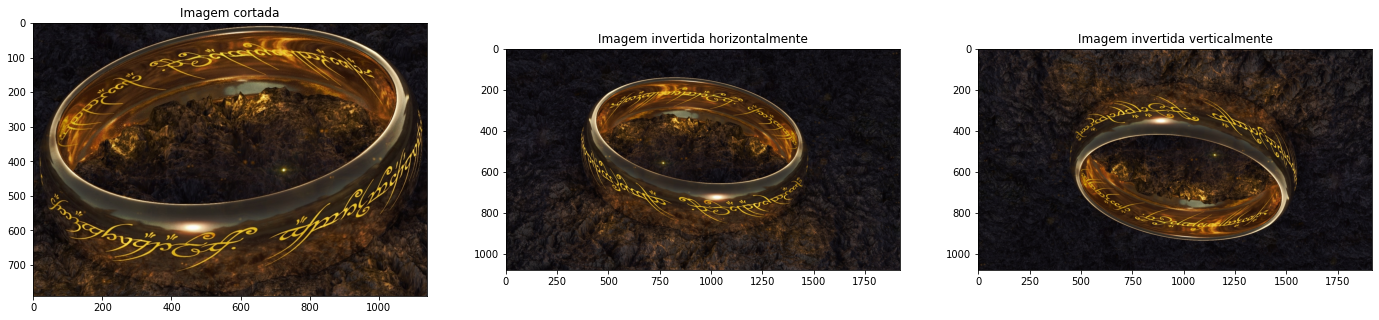

In [4]:
fig = plt.figure(figsize=(24,6))
fig.add_subplot(131)
plt.imshow(cropped_img)
plt.title('Imagem cortada')
fig.add_subplot(132)
plt.imshow(flip_x_img)
plt.title('Imagem invertida horizontalmente')
fig.add_subplot(133)
plt.title('Imagem invertida verticalmente')
plt.imshow(flip_y_img)
plt.show()

### 2.   Implement image translation using Numpy and OpenCV.

In [5]:
tx, ty = -450., 150.
translation = np.array([[1, 0, tx],
                        [0, 1, ty]
                        ])

height, width = img.shape[:2]
translated_img = cv2.warpAffine(img, translation, (width, height))

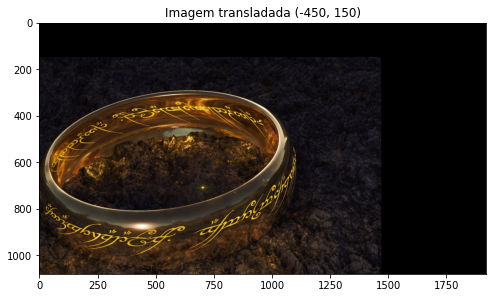

In [6]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(translated_img)
plt.title(f'Imagem transladada ({tx:.0f}, {ty:.0f})')
plt.show()

### 3.   Implement image rotation using Numpy and OpenCV.

In [7]:
theta = 30
height, width = img.shape[:2]
center = (width//2, height//2)
rotation = cv2.getRotationMatrix2D(center, theta, scale=1)
rotated_img = cv2.warpAffine(img, rotation, (width, height))

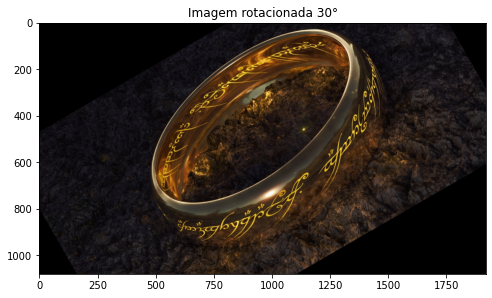

In [8]:
fig = plt.figure(figsize=(8,6))
plt.imshow(rotated_img)
plt.title(f'Imagem rotacionada {theta}°')
plt.show()

### 4.   Implement image resizing using OpenCV.

In [9]:
scale = 0.2  #20%
height, width = img.shape[:2]
new_width, new_height = (int(width*scale), int(height*scale))
resized_img = cv2.resize(img, (new_width, new_height))

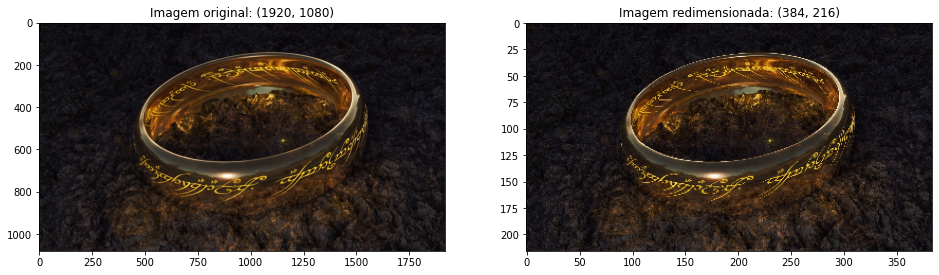

In [10]:
fig = plt.figure(figsize=(16,6))
fig.add_subplot(121)
plt.imshow(img)
plt.title(f'Imagem original: {(width, height)}')
fig.add_subplot(122)
plt.imshow(resized_img)
plt.title(f'Imagem redimensionada: {(new_width, new_height)}')
plt.show()

### 5.   Implement bitwise operations: AND, OR, XOR.

In [11]:
img1 = np.zeros((100, 100))
img2 = np.zeros((100, 100))
#cv2.rectangle(img, (x1, y1), (x2, y2), color, -1)
img1 = cv2.rectangle(img1, (10, 30), (90, 70), 255, -1)
img2 = cv2.rectangle(img2, (50, 10), (80, 90), 255, -1)

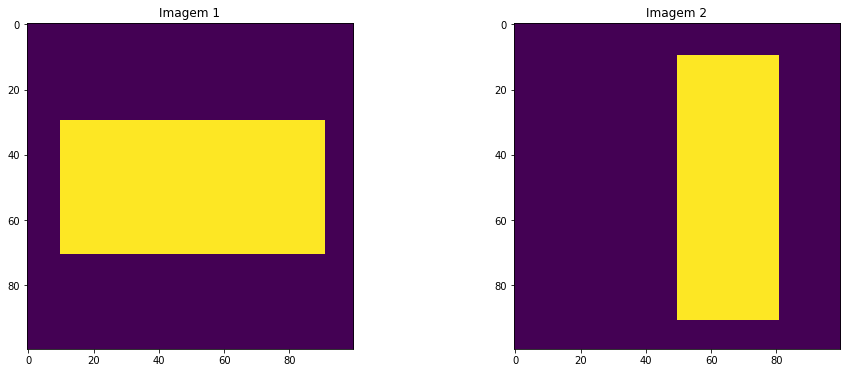

In [12]:
fig = plt.figure(figsize=(16,6))
fig.add_subplot(121)
plt.imshow(img1)
plt.title('Imagem 1')
fig.add_subplot(122)
plt.imshow(img2)
plt.title('Imagem 2')
plt.show()

In [13]:
bitwise_and = cv2.bitwise_and(img1, img2)
bitwise_or = cv2.bitwise_or(img1, img2)
bitwise_xor = cv2.bitwise_xor(img1, img2)

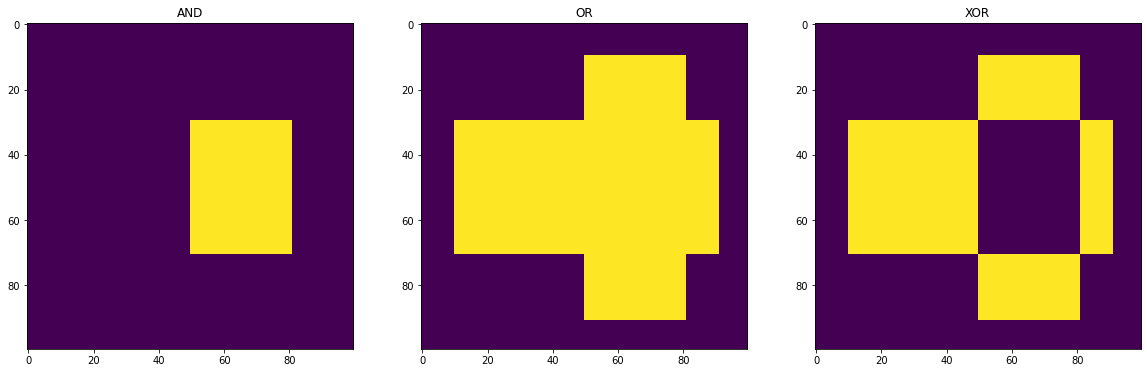

In [14]:
fig = plt.figure(figsize=(20, 6))
fig.add_subplot(131)
plt.imshow(bitwise_and)
plt.title('AND')
fig.add_subplot(132)
plt.imshow(bitwise_or)
plt.title('OR')
fig.add_subplot(133)
plt.imshow(bitwise_xor)
plt.title('XOR')
plt.show()

### 6.   Implement the "mask" operation, where a third image "h" contains only a Region of Interest (ROI - defined by the second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape.

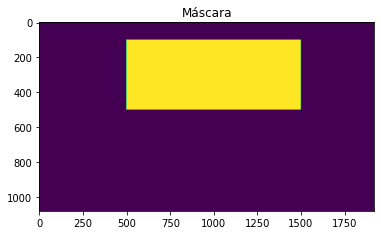

In [15]:
x_begin, x_end, y_begin, y_end = 500, 1500, 100, 500

mask = np.zeros(img.shape[:2], dtype='uint8')
cv2.rectangle(mask, (x_begin, y_begin), (x_end, y_end), 255, -1)

plt.imshow(mask)
plt.title('Máscara')
plt.show()

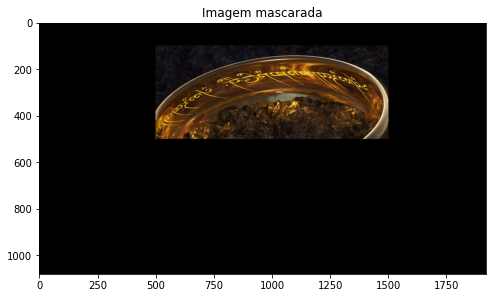

In [16]:
masked_img = cv2.bitwise_and(img, img, mask=mask)

fig = plt.figure(figsize=(8,6))
plt.imshow(masked_img)
plt.title('Imagem mascarada')
plt.show()